In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [101]:
df = sns.load_dataset('iris')

In [102]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [103]:
df.shape

(150, 5)

In [104]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [105]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [106]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [107]:
df.duplicated().sum()

np.int64(1)

In [108]:
df.drop_duplicates(inplace=True)

drop()	Removes specific rows or columns by index or label.   
dropna()	Removes rows or columns containing missing values.   
drop_duplicates()	Removes duplicate rows based on specified columns.

In [109]:
df.duplicated().sum()

np.int64(0)

In [110]:
df.describe().T.style.background_gradient(cmap='Accent')

,count,mean,std,min,25%,50%,75%,max
sepal_length,149.000000,5.843624,0.830851,4.300000,5.100000,5.800000,6.400000,7.900000
sepal_width,149.000000,3.059732,0.436342,2.000000,2.800000,3.000000,3.300000,4.400000
petal_length,149.000000,3.748993,1.767791,1.000000,1.600000,4.300000,5.100000,6.900000
petal_width,149.000000,1.194631,0.762622,0.100000,0.300000,1.300000,1.800000,2.500000


In [111]:
num = df.select_dtypes(include=['float'])
num

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


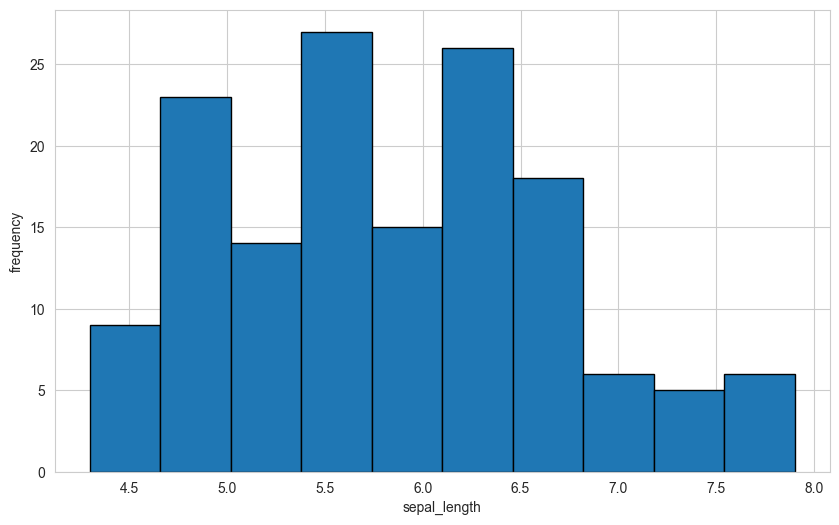

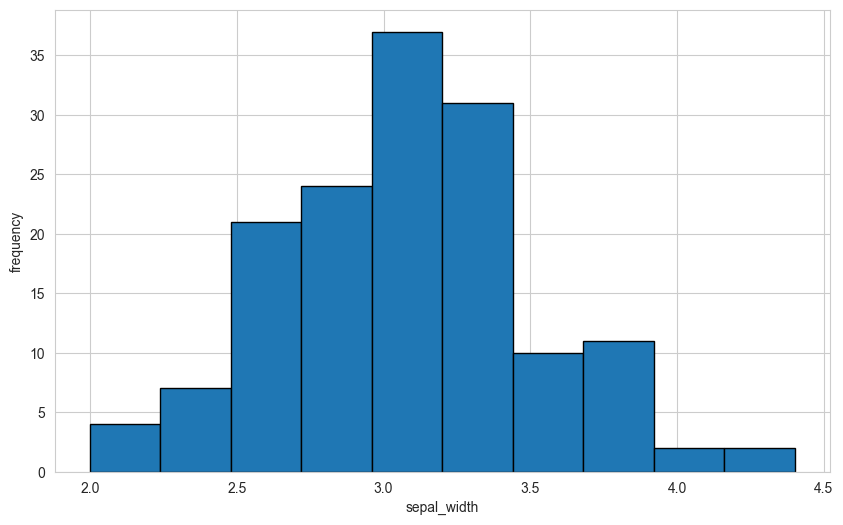

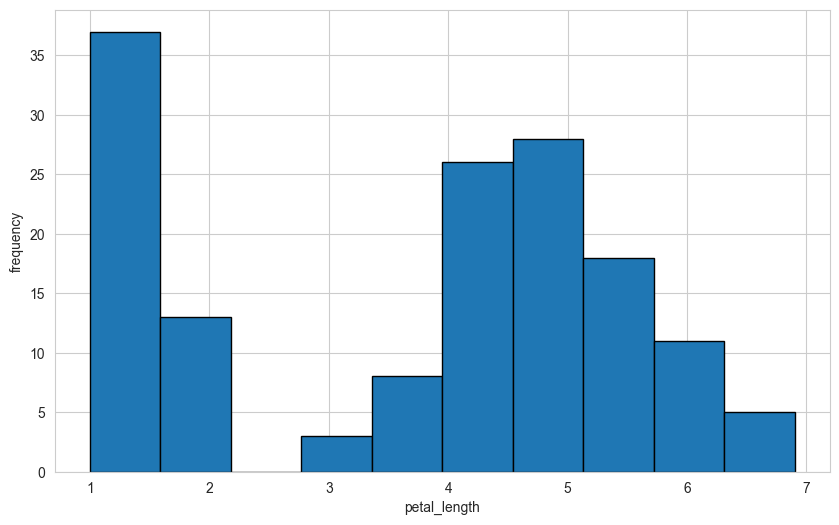

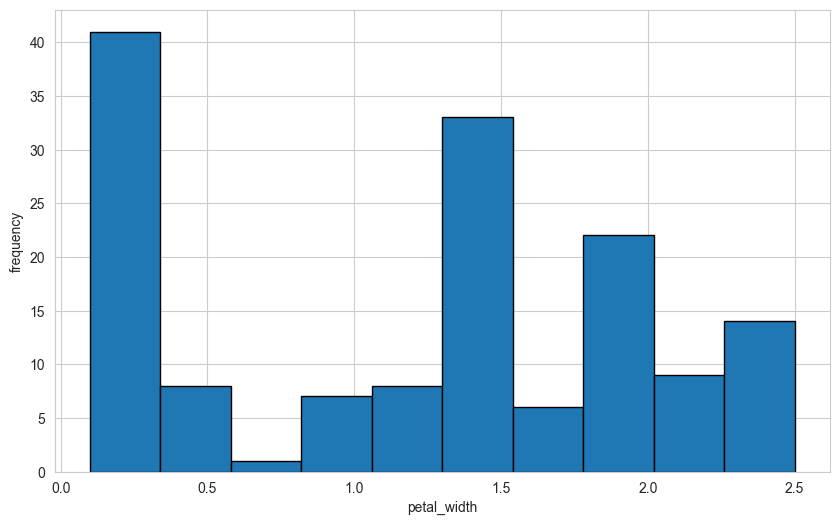

In [112]:
for col in num:
    plt.figure(figsize=(10,6))
    plt.hist(df[col],bins=10,edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

In [113]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

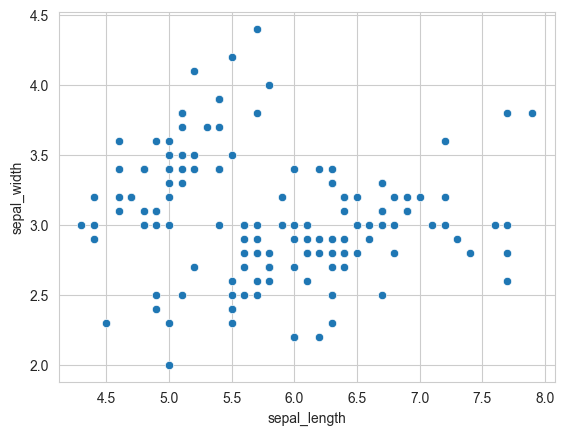

In [114]:
sns.scatterplot(x='sepal_length', y='sepal_width',data=df)

In [115]:
x= df[['sepal_length','sepal_width']]

In [116]:
sse = []#sum of square errorr
for k in range(1,11):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(x)
    sse.append(km.inertia_)


In [117]:
sse

[130.34483221476512,
 57.68007280669822,
 37.04993289689035,
 28.45306171186424,
 21.016329670329675,
 18.31389319014319,
 15.625821886446888,
 13.954318014361123,
 11.364804696951248,
 10.051903166114933]

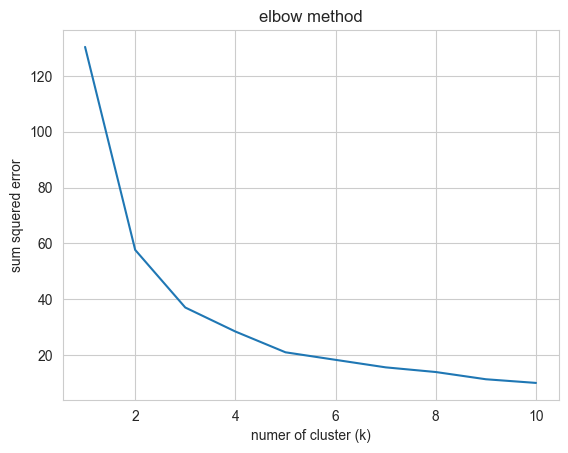

In [118]:
sns.set_style('whitegrid')
plt.plot(range(1,11),sse)
plt.xlabel('numer of cluster (k)')
plt.ylabel('sum squered error')
plt.title('elbow method')
plt.show()

In [145]:
Kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42) #init ='k-means++'
Kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [146]:
Kmeans.cluster_centers_

array([[5.60638298, 2.04042553],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [147]:
pred = Kmeans.predict(x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

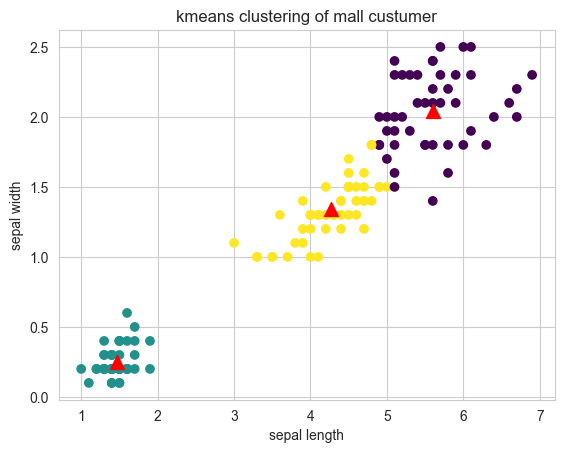

In [148]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=pred, cmap='viridis',marker='o')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1], s=100,c='red',marker='^')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('kmeans clustering of mall custumer')
plt.show()

In [149]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [150]:
inertia = Kmeans.inertia_
silhoutte = silhouette_score(x,pred)

print('inertia:',inertia)
print('silhouette_score:',silhouette_score)

inertia: 31.100968903436993
silhouette_score: <function silhouette_score at 0x0000027761EDECA0>


In [125]:
new_point = [[5,4]]
predicted_cluster = Kmeans.predict(new_point)
print(f'the new point {new_point} belong to cluster {predicted_cluster[0]}')

the new point [[5, 4]] belong to cluster 2


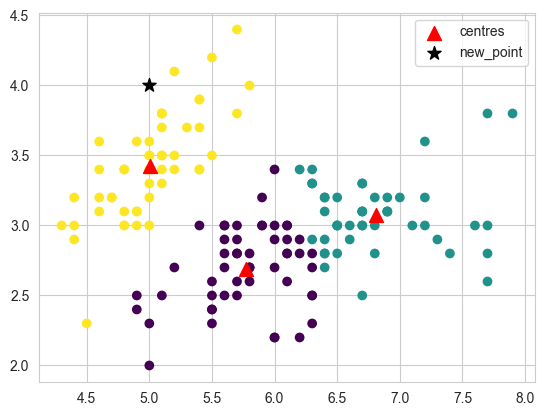

In [126]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=pred, cmap='viridis',marker='o')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1], s=100,c='red',marker='^', label='centres')
plt.scatter(new_point[0][0],new_point[0][1],c='black',s=100,marker='*',label='new_point')
plt.legend()
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

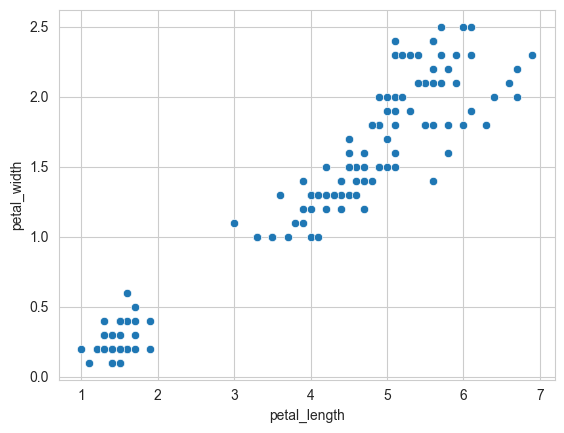

In [129]:
sns.scatterplot(x ='petal_length', y='petal_width',data=df)

In [133]:
x= df[['petal_length','petal_width']]

In [134]:
sse = []#sum of square errorr
for k in range(1,11):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(x)
    sse.append(km.inertia_)


In [135]:
sse

[548.5880536912753,
 86.31128251300521,
 31.100968903436993,
 19.278502923976603,
 14.169397683511185,
 11.351139731236504,
 10.505434065934063,
 8.927920933555606,
 7.467388181993444,
 5.707792443064182]

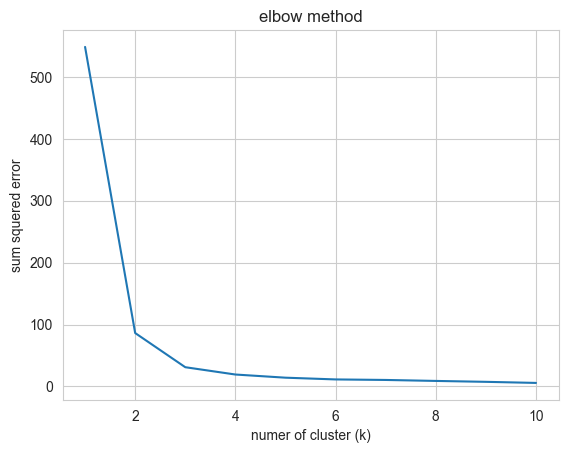

In [136]:
sns.set_style('whitegrid')
plt.plot(range(1,11),sse)
plt.xlabel('numer of cluster (k)')
plt.ylabel('sum squered error')
plt.title('elbow method')
plt.show()

In [140]:
Kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42) #init ='k-means++'
Kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [141]:
Kmeans.cluster_centers_

array([[5.60638298, 2.04042553],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [143]:
pred = Kmeans.predict(x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

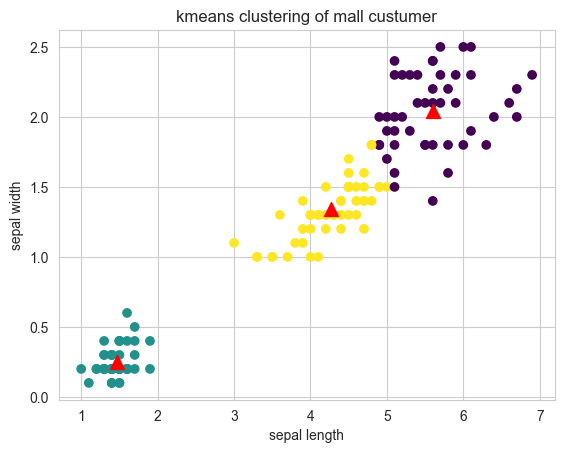

In [144]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=pred, cmap='viridis',marker='o')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1], s=100,c='red',marker='^')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('kmeans clustering of mall custumer')
plt.show()

In [ ]:
inertia = KMeans.inertia_
silhoutte = silhouette_score(x,pred)

print ('inertia:',inertia)
print